<a href="https://colab.research.google.com/github/Arkkhan603/TSFInternTasks/blob/main/TSF_Intern_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing necessary libraries

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans

## Loading Dataset

In [38]:
dt = pd.read_csv('https://raw.githubusercontent.com/Arkkhan603/TSFInternTasks/main/Iris.csv')

## Preprocessing Data

In [39]:
dt.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [40]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [41]:
dt.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [42]:
dt.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [43]:
X = dt.iloc[:,[1,2,3,4]].values

In [44]:
dt.iloc[:,[1,2,3,4]]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [45]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [46]:
X.shape

(150, 4)

## Determine the optimum number of clusters

In [47]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [48]:
plt.style.use('ggplot')

# Elbow Method

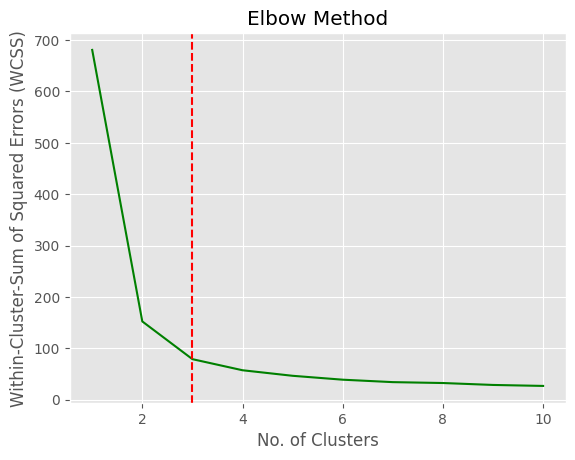

In [49]:
wcss=[]
a=11
for i in range(1,a):
  km = KMeans(n_clusters=i,init='random',n_init=10,max_iter=300,random_state=42)
  km.fit(X)
  wcss.append(km.inertia_)

sb.lineplot(x=range(1,a),y=wcss,color='green')
plt.axvline(x=3, color='r', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WCSS)')
plt.show()

# Silhouette Analysis

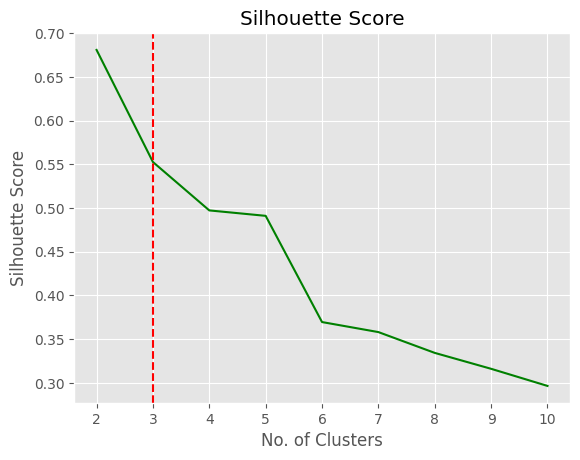

In [50]:
from sklearn.metrics import silhouette_score

sil_sc = []
for i in range(2,a):
  km = KMeans(n_clusters=i,init='random',n_init=10,max_iter=300,random_state=42)
  km.fit(X)
  score = silhouette_score(X,km.labels_)
  sil_sc.append(score)


plt.plot(range(2,a),sil_sc,color='green')
plt.axvline(x=3, color='r', linestyle='--')
plt.title('Silhouette Score')
plt.xlabel('No. of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

## Fitting the K-means algorithm

Why did I chose 3 clusters. Well,it is the result of the elbow method and the domain knowledge about the dataset itself that contributed to me choosing three clusters.

In [51]:
km = KMeans(n_clusters=3,init='k-means++',max_iter=200,n_init='auto',random_state=42)
y_pred = km.fit_predict(X)

km.cluster_centers_

array([[6.85384615, 3.07692308, 5.71538462, 2.05384615],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.88360656, 2.74098361, 4.38852459, 1.43442623]])

In [52]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

## Visualizing Clusters

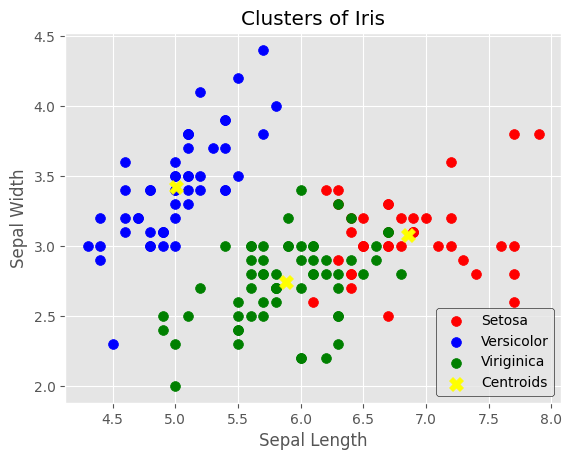

In [53]:
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s=50, c='red', label='Setosa')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s=50, c='blue', label='Versicolor')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s=50, c='green', label='Viriginica')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=100, c='yellow', label='Centroids',marker='X')
plt.title('Clusters of Iris')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
legend = plt.legend(frameon=True,loc='lower right',edgecolor='black')
for text in legend.get_texts():
    text.set_color('black')
plt.show()